# Credit Risk - Data Modelling

## Importing the libraries

In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## Importing data from a csv

In [88]:
pd.options.display.max_columns = None

In [89]:
df_loan = pd.read_csv('/content/drive/MyDrive/Python/loan_data_2007_2014.csv')
df_loan.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16754 entries, 0 to 16753
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   16754 non-null  int64  
 1   id                           16754 non-null  int64  
 2   member_id                    16754 non-null  int64  
 3   loan_amnt                    16754 non-null  int64  
 4   funded_amnt                  16754 non-null  int64  
 5   funded_amnt_inv              16754 non-null  float64
 6   term                         16754 non-null  object 
 7   int_rate                     16754 non-null  float64
 8   installment                  16754 non-null  float64
 9   grade                        16754 non-null  object 
 10  sub_grade                    16754 non-null  object 
 11  emp_title                    15655 non-null  object 
 12  emp_length                   16169 non-null  object 
 13  home_ownership  

## Cleaning Data

Changing variables types

In [91]:
df_loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [92]:
df_loan['emp_length_int'] = df_loan['emp_length'].str.replace("\+ years", "")
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\< 1 year", str(0))
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace('n/a', str(0))
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ years", "")
df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ year", "")

<ipython-input-92-4110cd9adc17>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length'].str.replace("\+ years", "")
<ipython-input-92-4110cd9adc17>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\< 1 year", str(0))
<ipython-input-92-4110cd9adc17>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ years", "")
<ipython-input-92-4110cd9adc17>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_loan['emp_length_int'] = df_loan['emp_length_int'].str.replace("\ year", "")


In [93]:
df_loan['emp_length_int'].fillna(0, inplace=True)
df_loan['emp_length_int'].unique()

array(['10', '0', '1', '3', '8', '9', '4', '5', '6', '2', '7', 0],
      dtype=object)

In [94]:
# Numbers still strings
df_loan['emp_length_int'] = pd.to_numeric(df_loan['emp_length_int'])
df_loan['emp_length_int'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [95]:
df_loan['emp_length_int'].dtypes 

dtype('int64')

Variable 'Employment length in years' now is a integer number, going to another variable.

In [96]:
df_loan['earliest_cr_line'].unique() #should be a date variable

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [97]:
df_loan['earliest_cr_line_date'] = pd.to_datetime(df_loan['earliest_cr_line'], format='%b-%y')
df_loan['mths_since_earliest_cr_line'] = round( pd.to_numeric( (pd.to_datetime('2017-12-01') - df_loan['earliest_cr_line_date'] ) / np.timedelta64(1, 'M') ))
df_loan['mths_since_earliest_cr_line'].describe()

count    16754.000000
mean       244.093709
std         91.683318
min       -609.000000
25%        192.000000
50%        230.000000
75%        286.000000
max        586.000000
Name: mths_since_earliest_cr_line, dtype: float64

Somehow it returned a negative value.

In [98]:
df_loan.loc[ : , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][df_loan['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
3413,Jun-67,2067-06-01,-594.0
3607,Aug-67,2067-08-01,-596.0
3989,Dec-63,2063-12-01,-552.0
4440,Sep-68,2068-09-01,-609.0
4449,Sep-68,2068-09-01,-609.0


In [99]:
df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] = df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] - pd.DateOffset(years=100)

<ipython-input-99-0a34ac2ec276>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] = df_loan['earliest_cr_line_date'][df_loan['mths_since_earliest_cr_line'] < 0] - pd.DateOffset(years=100)


looking at the datframe with negatives values, you can see that the convertion to the date format went wrong. So I subtract 100 years on those negatives date and I will calculate it again.

In [100]:
df_loan['mths_since_earliest_cr_line'] = round( pd.to_numeric( (pd.to_datetime('2017-12-01') - df_loan['earliest_cr_line_date'] ) / np.timedelta64(1, 'M') ))
df_loan['mths_since_earliest_cr_line'].describe()

count    16754.000000
mean       247.388445
std         83.908958
min        109.000000
25%        192.000000
50%        230.000000
75%        287.000000
max        863.000000
Name: mths_since_earliest_cr_line, dtype: float64

Everything seems to look right. Going to do the same thing to the others variables we are going to use on the models.


In [101]:
df_loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [102]:
df_loan['term_int'] = df_loan['term'].str.replace(' ', '')
df_loan['term_int'] = df_loan['term_int'].str.replace('months', '')

In [103]:
df_loan['term_int'] = pd.to_numeric(df_loan['term_int'])

In [104]:
df_loan['term_int'].dtypes

dtype('int64')

Solved the term length issue. Replaced and converted to integer number.

In [105]:
df_loan['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11'], dtype=object)

In [106]:
df_loan['issue_date'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y')
df_loan['mths_issue_date'] = round( pd.to_numeric( (pd.to_datetime('2017-12-01') - df_loan['issue_date'] ) / np.timedelta64(1, 'M') )) #Using a random data on then same year of this dataset was extracted 
df_loan['mths_issue_date'].describe()

count    16754.000000
mean        75.491345
std          2.426835
min         72.000000
25%         73.000000
50%         75.000000
75%         78.000000
max         80.000000
Name: mths_issue_date, dtype: float64

In [107]:
df_loan['issue_date'].unique()

array(['2011-12-01T00:00:00.000000000', '2011-11-01T00:00:00.000000000',
       '2011-10-01T00:00:00.000000000', '2011-09-01T00:00:00.000000000',
       '2011-08-01T00:00:00.000000000', '2011-07-01T00:00:00.000000000',
       '2011-06-01T00:00:00.000000000', '2011-05-01T00:00:00.000000000',
       '2011-04-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [108]:
df_loan['mths_issue_date'].unique()

array([72., 73., 74., 75., 76., 77., 78., 79., 80.])

Transforming into binaries variables.

In [109]:
pd.get_dummies(df_loan['grade']).head()

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [110]:
pd.get_dummies(df_loan['grade'], prefix = 'grade', prefix_sep = ':').head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [111]:
loan_data_dummies = [pd.get_dummies(df_loan['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(df_loan['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(df_loan['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(df_loan['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(df_loan['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(df_loan['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(df_loan['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(df_loan['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

In [112]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
loan_data_dummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:MORTGAGE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IL,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [113]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [114]:
df_loan = pd.concat([df_loan, loan_data_dummies], axis = 1) #do a join on the dataframe

In [115]:
df_loan.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

Dealing with missing values.

In [116]:
df_loan.isnull()
pd.options.display.max_rows = None
df_loan.isnull().sum()

Unnamed: 0                                 0
id                                         0
member_id                                  0
loan_amnt                                  0
funded_amnt                                0
funded_amnt_inv                            0
term                                       0
int_rate                                   0
installment                                0
grade                                      0
sub_grade                                  0
emp_title                               1099
emp_length                               585
home_ownership                             0
annual_inc                                 0
verification_status                        0
issue_d                                    0
loan_status                                0
pymnt_plan                                 0
url                                        0
desc                                    7089
purpose                                    0
title     

In [117]:
pd.options.display.max_rows = 100

In [118]:
df_loan['total_rev_hi_lim'].fillna(df_loan['funded_amnt'], inplace = True)

In [119]:
df_loan['total_rev_hi_lim'].isnull().sum()

0

Filling with the funded amount column was a sucess

In [120]:
df_loan['annual_inc'].fillna(df_loan['annual_inc'].mean(), inplace=True) # Filling with the mean value, but the rest i will fill with 0

In [121]:
df_loan['annual_inc'].isnull().sum()

0

In [122]:
df_loan['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df_loan['acc_now_delinq'].fillna(0, inplace=True)
df_loan['total_acc'].fillna(0, inplace=True)
df_loan['pub_rec'].fillna(0, inplace=True)
df_loan['open_acc'].fillna(0, inplace=True)
df_loan['inq_last_6mths'].fillna(0, inplace=True)
df_loan['delinq_2yrs'].fillna(0, inplace=True)
df_loan['emp_length_int'].fillna(0, inplace=True)

In [123]:
df_loan['emp_length_int'].isnull().sum()

0

# PD Model - Probability of Default

In [124]:
df_loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'],
      dtype=object)

In [125]:
df_loan['loan_status'].value_counts()

Fully Paid            12606
Charged Off            2514
Current                1564
Late (31-120 days)       41
In Grace Period          13
Late (16-30 days)        11
Default                   5
Name: loan_status, dtype: int64

In [126]:
df_loan['loan_status'].count()

16754

In [127]:
df_loan['loan_status'].value_counts() / df_loan['loan_status'].count()

Fully Paid            0.752417
Charged Off           0.150054
Current               0.093351
Late (31-120 days)    0.002447
In Grace Period       0.000776
Late (16-30 days)     0.000657
Default               0.000298
Name: loan_status, dtype: float64

In [128]:
df_loan['good_bad'] = np.where(df_loan['loan_status'].isin(['Charged Off','Late (31-120 days)','Default']),  0,  1)

In [129]:
df_loan[['loan_status','good_bad']]

,loan_status,good_bad
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
4,Current,1
...,...,...
16749,Fully Paid,1
16750,Fully Paid,1
16751,Fully Paid,1
16752,Fully Paid,1


In [130]:
df_loan['good_bad'].sum()

14194

## Splitting Data

In [131]:
train_test_split(df_loan.drop('good_bad', axis = 1), df_loan['good_bad']) #Taking this column out of the train data, this the target, so it cannot be used as a variable

[       Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
 11566       11566   811676    1018745       6075         6075   
 14922       14922   749427     948661       9450         9450   
 15202       15202   752339     951917      15000         9650   
 712           712  1055190    1286745       5000         5000   
 2265         2265  1038617    1268526      18825        18825   
 ...           ...      ...        ...        ...          ...   
 14967       14967   757349     957379       7000         7000   
 8167         8167   869878    1083777       8000         8000   
 15872       15872   742071     940087       5000         5000   
 4730         4730   997734    1222858       6100         6100   
 13047       13047   788396     992088      35000        22025   
 
        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 11566           6075.0   60 months     15.99       147.70     D        D2   
 14922           9450.0   36 months      5.99     

it returned 4 dataframes, so I will apply each to a specific dataframe

In [132]:
df_loan_train, df_loan_test, df_loan_train_target, df_loan_test_target  = train_test_split(df_loan.drop('good_bad', axis = 1), df_loan['good_bad'])

In [133]:
df_loan_train, df_loan_test, df_loan_train_target, df_loan_test_target  = train_test_split(df_loan.drop('good_bad', axis = 1), df_loan['good_bad'], test_size = 0.2, random_state = 42)

In [134]:
df_loan_train.shape

(13403, 196)

In [135]:
df_loan_test.shape

(3351, 196)

In [136]:
df_loan_train_target.shape

(13403,)

In [137]:
df_loan_test_target.shape

(3351,)

In [138]:
df_inputs = df_loan_train
df_targets = df_loan_train_target

In [139]:
df_inputs['grade'].unique()

array(['B', 'A', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [140]:
df = pd.concat([df_inputs['grade'], df_targets], axis = 1)
df.head()

,grade,good_bad
11874,B,1
4743,A,1
12522,B,1
2019,D,0
15293,C,1


In [141]:
df.columns.values[0]

'grade'

In [142]:
df.groupby(df.columns.values[0], as_index = False  )[df.columns.values[1]].count()

,grade,good_bad
0,A,3553
1,B,4091
2,C,2469
3,D,1738
4,E,1044
5,F,403
6,G,105


In [143]:
df1  = pd.concat(
    [df.groupby(df.columns.values[0],  as_index = False)[df.columns.values[1]].count(),
    df.groupby(df.columns.values[0],  as_index = False)[df.columns.values[1]].mean()] , axis=1
)

df1.head()

,grade,good_bad,grade,good_bad
0,A,3553,A,0.931889
1,B,4091,B,0.877047
2,C,2469,C,0.822600
3,D,1738,D,0.762371
4,E,1044,E,0.721264


In [144]:
df1 = df1.iloc[:,[0,1,3]]

In [145]:
df1.columns = [df1.columns.values[0] , 'n_obs' , 'prop_good']
df1

,grade,n_obs,prop_good
0,A,3553,0.931889
1,B,4091,0.877047
2,C,2469,0.822600
3,D,1738,0.762371
4,E,1044,0.721264
5,F,403,0.657568
6,G,105,0.657143


In [146]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [147]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,3553,0.931889,0.265090
1,B,4091,0.877047,0.305230
2,C,2469,0.822600,0.184212
3,D,1738,0.762371,0.129672
4,E,1044,0.721264,0.077893
5,F,403,0.657568,0.030068
6,G,105,0.657143,0.007834


In [148]:
df1['n_good'] = df1.prop_good       * df1.n_obs
df1['n_bad']  = (1 - df1.prop_good) * df1.n_obs
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,3553,0.931889,0.265090,3311.0,242.0
1,B,4091,0.877047,0.305230,3588.0,503.0
2,C,2469,0.822600,0.184212,2031.0,438.0
3,D,1738,0.762371,0.129672,1325.0,413.0
4,E,1044,0.721264,0.077893,753.0,291.0
5,F,403,0.657568,0.030068,265.0,138.0
6,G,105,0.657143,0.007834,69.0,36.0


In [149]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad']  = df1['n_bad']  / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,3553,0.931889,0.265090,3311.0,242.0,0.291924,0.117419
1,B,4091,0.877047,0.305230,3588.0,503.0,0.316346,0.244056
2,C,2469,0.822600,0.184212,2031.0,438.0,0.179069,0.212518
3,D,1738,0.762371,0.129672,1325.0,413.0,0.116822,0.200388
4,E,1044,0.721264,0.077893,753.0,291.0,0.066390,0.141194
5,F,403,0.657568,0.030068,265.0,138.0,0.023364,0.066958
6,G,105,0.657143,0.007834,69.0,36.0,0.006084,0.017467


## Calculating the Weight of Evidence of this Categorical Variable

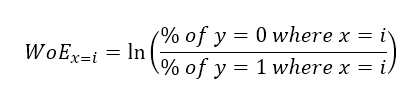

In [150]:
df1['WoE'] = np.log( df1.prop_n_good / df1.prop_n_bad )
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,3553,0.931889,0.265090,3311.0,242.0,0.291924,0.117419,0.910746
1,B,4091,0.877047,0.305230,3588.0,503.0,0.316346,0.244056,0.259439
2,C,2469,0.822600,0.184212,2031.0,438.0,0.179069,0.212518,-0.171257
3,D,1738,0.762371,0.129672,1325.0,413.0,0.116822,0.200388,-0.539601
4,E,1044,0.721264,0.077893,753.0,291.0,0.066390,0.141194,-0.754579
5,F,403,0.657568,0.030068,265.0,138.0,0.023364,0.066958,-1.052845
6,G,105,0.657143,0.007834,69.0,36.0,0.006084,0.017467,-1.054734


In [151]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,105,0.657143,0.007834,69.0,36.0,0.006084,0.017467,-1.054734
1,F,403,0.657568,0.030068,265.0,138.0,0.023364,0.066958,-1.052845
2,E,1044,0.721264,0.077893,753.0,291.0,0.066390,0.141194,-0.754579
3,D,1738,0.762371,0.129672,1325.0,413.0,0.116822,0.200388,-0.539601
4,C,2469,0.822600,0.184212,2031.0,438.0,0.179069,0.212518,-0.171257
5,B,4091,0.877047,0.305230,3588.0,503.0,0.316346,0.244056,0.259439
6,A,3553,0.931889,0.265090,3311.0,242.0,0.291924,0.117419,0.910746


In [154]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,105,0.657143,0.007834,69.0,36.0,0.006084,0.017467,-1.054734,NaN,NaN
1,F,403,0.657568,0.030068,265.0,138.0,0.023364,0.066958,-1.052845,0.000425,0.001889
2,E,1044,0.721264,0.077893,753.0,291.0,0.066390,0.141194,-0.754579,0.063696,0.298266
3,D,1738,0.762371,0.129672,1325.0,413.0,0.116822,0.200388,-0.539601,0.041106,0.214978
4,C,2469,0.822600,0.184212,2031.0,438.0,0.179069,0.212518,-0.171257,0.060230,0.368345
5,B,4091,0.877047,0.305230,3588.0,503.0,0.316346,0.244056,0.259439,0.054447,0.430695
6,A,3553,0.931889,0.265090,3311.0,242.0,0.291924,0.117419,0.910746,0.054841,0.651308


## Calculating the Information Value (IV)

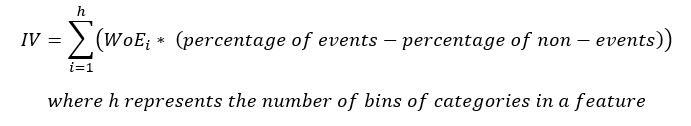

In [155]:
df1['IV'] = (df1.prop_n_good - df1.prop_n_bad) * df1.WoE
df1.IV = df1.IV.sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,105,0.657143,0.007834,69.0,36.0,0.006084,0.017467,-1.054734,NaN,NaN,0.342854
1,F,403,0.657568,0.030068,265.0,138.0,0.023364,0.066958,-1.052845,0.000425,0.001889,0.342854
2,E,1044,0.721264,0.077893,753.0,291.0,0.066390,0.141194,-0.754579,0.063696,0.298266,0.342854
3,D,1738,0.762371,0.129672,1325.0,413.0,0.116822,0.200388,-0.539601,0.041106,0.214978,0.342854
4,C,2469,0.822600,0.184212,2031.0,438.0,0.179069,0.212518,-0.171257,0.060230,0.368345,0.342854
5,B,4091,0.877047,0.305230,3588.0,503.0,0.316346,0.244056,0.259439,0.054447,0.430695,0.342854
6,A,3553,0.931889,0.265090,3311.0,242.0,0.291924,0.117419,0.910746,0.054841,0.651308,0.342854
